## 4. Isneique, uma entidade 4D que vive a maior parte do tempo no complemento do nosso R³ em relação ao R⁴, aparece raramente no nosso hiperplano com a forma de uma “serpente”. Considere a fenda espacial que ela utiliza para se projetar no nosso R³ delimitada pelos planos 𝐴 = − 2𝑥 + 𝑦 − 𝑧 = 1 e 𝐵 = 𝑦 + 𝑧 = 1, . 

## Sempre que Isneique passa por um plano, ela é refletida em relação ao plano 𝐶 = {(𝑥, 𝑦, 𝑧)| (0, 1, 0) + 𝑞(− 2, 1 + 3, 1 − 3) + 𝑝(− 1, − 1, 1)} . Deseja-se animar a sua passagem pela nossa humilde dimensão da seguinte forma: a serpente sempre invade o nosso espaço num movimento espiral em torno do eixo 𝐷 = (− 𝑡, 1 − 𝑡, 𝑡), com fator de translação do eixo (no sentido do eixo) de de 2 a cada volta e sempre que passa por um dos planos da fenda A ou B, é refletido em relação ao plano C, continuando seu movimento espiral em torno de D. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# DEFINIÇÃO DOS PLANOS E DO EIXO

print("=" * 40)
print("PROBLEMA 1: DEFINIÇÃO DOS ELEMENTOS GEOMÉTRICOS")
print("=" * 40)

# Plano A: -2x + y - z = 1
# Normal: (-2, 1, -1)
normal_A = np.array([-2, 1, -1])
d_A = 1
print("\nPlano A: -2x + y - z = 1")
print(f"Normal de A: {normal_A}")

# Plano B: y + z = 1
# Normal: (0, 1, 1)
normal_B = np.array([0, 1, 1])
d_B = 1
print("\nPlano B: y + z = 1")
print(f"Normal de B: {normal_B}")

# Plano C (plano de reflexão)
# C = {(x,y,z) | (0,1,0) + q(-2, 4, -2) + p(-1, -1, 1)}
# Dois vetores diretores: v1 = (-2, 4, -2), v2 = (-1, -1, 1)
v1_C = np.array([-2, 4, -2])
v2_C = np.array([-1, -1, 1])

# Normal = v1 × v2
normal_C = np.cross(v1_C, v2_C)
normal_C = normal_C / np.linalg.norm(normal_C)  # normalizar
ponto_C = np.array([0, 1, 0])
d_C = np.dot(normal_C, ponto_C)
print("\nPlano C (reflexão):")
print(f"Normal de C (normalizada): {normal_C}")
print(f"Ponto em C: {ponto_C}")

# Eixo D: (-t, 1-t, t)
# Direção: (-1, -1, 1)
direcao_D = np.array([-1, -1, 1])
direcao_D = direcao_D / np.linalg.norm(direcao_D)  # normalizar
ponto_D = np.array([0, 1, 0])  # quando t=0
print("\nEixo D: (-t, 1-t, t)")
print(f"Direção de D (normalizada): {direcao_D}")
print(f"Ponto base: {ponto_D}")

PROBLEMA 1: DEFINIÇÃO DOS ELEMENTOS GEOMÉTRICOS

Plano A: -2x + y - z = 1
Normal de A: [-2  1 -1]

Plano B: y + z = 1
Normal de B: [0 1 1]

Plano C (reflexão):
Normal de C (normalizada): [0.26726124 0.53452248 0.80178373]
Ponto em C: [0 1 0]

Eixo D: (-t, 1-t, t)
Direção de D (normalizada): [-0.57735027 -0.57735027  0.57735027]
Ponto base: [0 1 0]


## a) Exiba as matrizes em coordenadas homogêneas e na ordem correta pra realizar a animação desse movimento. Simule o movimento da “serpente”.

PROBLEMA 2: MATRIZES DE TRANSFORMAÇÃO E SIMULAÇÃO

1. Matriz de Reflexão no Plano C:
[[ 0.85714286 -0.28571429 -0.42857143  0.28571429]
 [-0.28571429  0.42857143 -0.85714286  0.57142857]
 [-0.42857143 -0.85714286 -0.28571429  0.85714286]
 [ 0.          0.          0.          1.        ]]

2. Matriz de Rotação em torno de D (ângulo = 2π):
[[ 1.00000000e+00  1.41410032e-16  1.41410032e-16 -1.41410032e-16]
 [-1.41410032e-16  1.00000000e+00 -1.41410032e-16  0.00000000e+00]
 [-1.41410032e-16  1.41410032e-16  1.00000000e+00 -1.41410032e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

3. Matriz de Translação ao longo de D (distância = 2):
[[ 1.          0.          0.         -1.15470054]
 [ 0.          1.          0.         -1.15470054]
 [ 0.          0.          1.          1.15470054]
 [ 0.          0.          0.          1.        ]]

4. Matriz de Movimento Espiral (Rotação + Translação):
[[ 1.00000000e+00  1.41410032e-16  1.41410032e-16 -1.15470054e+00]
 [-1.4

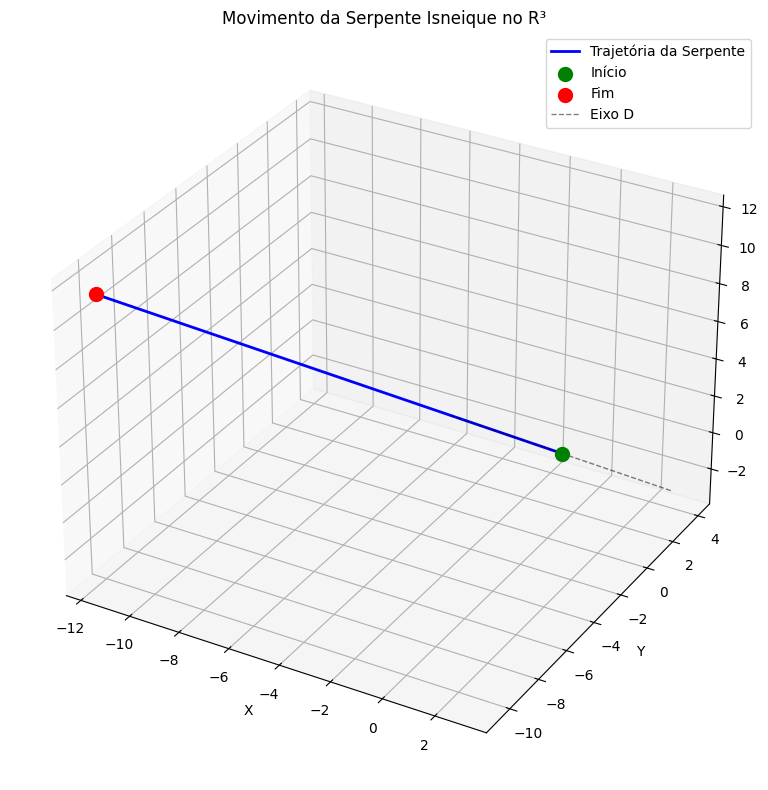

In [3]:
print("PROBLEMA 2: MATRIZES DE TRANSFORMAÇÃO E SIMULAÇÃO")

def matriz_reflexao(normal, ponto):
    n = normal / np.linalg.norm(normal)
    d = -np.dot(n, ponto)
    
    # Matriz de reflexão 3x3
    R = np.eye(3) - 2 * np.outer(n, n)
    
    # Converter para coordenadas homogêneas 4x4
    M = np.eye(4)
    M[:3, :3] = R
    M[:3, 3] = -2 * d * n
    
    return M

def matriz_rotacao_eixo(eixo, angulo, ponto):
    # Normalizar eixo
    u = eixo / np.linalg.norm(eixo)
    ux, uy, uz = u
    c = np.cos(angulo)
    s = np.sin(angulo)
    t = 1 - c
    
    # Matriz de rotação de Rodrigues
    R = np.array([
        [t*ux*ux + c,    t*ux*uy - s*uz, t*ux*uz + s*uy],
        [t*ux*uy + s*uz, t*uy*uy + c,    t*uy*uz - s*ux],
        [t*ux*uz - s*uy, t*uy*uz + s*ux, t*uz*uz + c]
    ])
    
    # Converter para coordenadas homogêneas
    M = np.eye(4)
    
    # Transladar ponto para origem
    T1 = np.eye(4)
    T1[:3, 3] = -ponto
    
    # Rotação
    R_hom = np.eye(4)
    R_hom[:3, :3] = R
    
    # Transladar de volta
    T2 = np.eye(4)
    T2[:3, 3] = ponto
    
    # Compor transformações
    M = T2 @ R_hom @ T1
    
    return M

def matriz_translacao_eixo(eixo, distancia):
    u = eixo / np.linalg.norm(eixo)
    M = np.eye(4)
    M[:3, 3] = distancia * u
    return M

# Criar as matrizes principais
print("\n1. Matriz de Reflexão no Plano C:")
M_reflexao_C = matriz_reflexao(normal_C, ponto_C)
print(M_reflexao_C)

# Movimento espiral: rotação + translação
angulo_volta = 2 * np.pi  # uma volta completa
translacao_volta = 2  # fator de translação por volta

print(f"\n2. Matriz de Rotação em torno de D (ângulo = 2π):")
M_rotacao_D = matriz_rotacao_eixo(direcao_D, angulo_volta, ponto_D)
print(M_rotacao_D)

print(f"\n3. Matriz de Translação ao longo de D (distância = 2):")
M_translacao_D = matriz_translacao_eixo(direcao_D, translacao_volta)
print(M_translacao_D)

print("\n4. Matriz de Movimento Espiral (Rotação + Translação):")
M_espiral = M_translacao_D @ M_rotacao_D
print(M_espiral)

# Função para verificar se um ponto cruza um plano
def cruza_plano(p1, p2, normal, d):
    val1 = np.dot(normal, p1[:3]) - d
    val2 = np.dot(normal, p2[:3]) - d
    return val1 * val2 < 0

# SIMULAÇÃO DO MOVIMENTO

# Posição inicial da serpente
posicao = np.array([0, 1, 0, 1])  # coordenadas homogêneas
trajetoria = [posicao[:3].copy()]

# Parâmetros da simulação
num_passos = 200
angulo_passo = 2 * np.pi / 20  # 20 passos por volta
dist_passo = translacao_volta / 20

# Matriz de um passo espiral
M_passo = matriz_translacao_eixo(direcao_D, dist_passo) @ \
          matriz_rotacao_eixo(direcao_D, angulo_passo, ponto_D)

print(f"\nSimulando {num_passos} passos...")
reflexoes = 0

for i in range(num_passos):
    posicao_anterior = posicao.copy()
    
    # Aplicar movimento espiral
    posicao = M_passo @ posicao
    
    # Verificar cruzamento com plano A
    if cruza_plano(posicao_anterior, posicao, normal_A, d_A):
        print(f"Passo {i}: Reflexão no plano A!")
        posicao = M_reflexao_C @ posicao
        reflexoes += 1
    
    # Verificar cruzamento com plano B
    if cruza_plano(posicao_anterior, posicao, normal_B, d_B):
        print(f"Passo {i}: Reflexão no plano B!")
        posicao = M_reflexao_C @ posicao
        reflexoes += 1
    
    trajetoria.append(posicao[:3].copy())

print(f"\nTotal de reflexões: {reflexoes}")

# Converter trajetória para array numpy
trajetoria = np.array(trajetoria)

# VISUALIZAÇÃO
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar trajetória
ax.plot(trajetoria[:, 0], trajetoria[:, 1], trajetoria[:, 2], 
        'b-', linewidth=2, label='Trajetória da Serpente')
ax.scatter(trajetoria[0, 0], trajetoria[0, 1], trajetoria[0, 2], 
           color='green', s=100, label='Início')
ax.scatter(trajetoria[-1, 0], trajetoria[-1, 1], trajetoria[-1, 2], 
           color='red', s=100, label='Fim')

# Plotar eixo D
t_vals = np.linspace(-5, 5, 100)
eixo_D_pontos = np.array([ponto_D + t * direcao_D for t in t_vals])
ax.plot(eixo_D_pontos[:, 0], eixo_D_pontos[:, 1], eixo_D_pontos[:, 2], 
        'k--', linewidth=1, alpha=0.5, label='Eixo D')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Movimento da Serpente Isneique no R³')
ax.legend()
plt.tight_layout()
plt.show()

## b) Que adaptações seriam necessárias, caso os planos da fenda A e B começassem a rotacionar em torno de D com a mesma velocidade angular ω, A no sentido H e B no sentido AH? Explique com suas palavras